In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

import re
import torch
import seaborn as sns

from nltk.corpus import wordnet
#from wordcloud import WordCloud, STOPWORDS

from collections import Counter
import multiprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

In [2]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score
from skmultilearn.problem_transform import BinaryRelevance

LOADING DATA

MULTI LABEL CLASSIFICATION

In [3]:
train = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')

In [ ]:
train.info()

In [ ]:
train.describe()

In [4]:
train.dropna(inplace=True)
train=train.drop_duplicates(subset=['comment_text'])

In [6]:
def clean_text(text):
    punct_tag=re.compile(r'[\.,!?;:]+')
    text=punct_tag.sub(r'',text)
    html_tag=re.compile(r'<.*?>')
    text=html_tag.sub(r'',text)
    html_tag=re.compile(r'<.*?>')
    text=html_tag.sub(r'',text)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r'',text)
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',text)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    data= text
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)  
    return data

train['comment_text'] = train['comment_text'].map(lambda com : clean_text(com))

train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords.words('english')

def stopword_removal(my_txt):
    filtered_list = []
    stop_words = nltk.corpus.stopwords.words('english')

    words = word_tokenize(my_txt)
    for w in words:
        if w.lower() not in stop_words:
            filtered_list.append(w)
    filtered_list
    my_clean_txt = " ".join(filtered_list)
    return my_clean_txt

train['comment_text_tokens'] = train['comment_text'].apply(stopword_removal)
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_tokens
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [8]:
def get_toxic(t):
    if t==0:
        return 1
    else:
        return 0

train['value']=train[ 'toxic']+train['severe_toxic']+train['obscene']+train['threat']+train['insult']+train['identity_hate']

train['non-toxic']=train['value'].apply(get_toxic)
train.drop(columns=['value'],axis=1,inplace=True)
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_tokens,non-toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...,1
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...,1
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...,1
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,make real suggestions improvement wondered sec...,1
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page,1


In [ ]:
cols_target = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate','non-toxic']

train[cols_target].sum()
labels=['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate','non-toxic']
plt.figure(figsize=(8,8))
plt.pie(train[cols_target].sum(), labels=labels,autopct="%1.2f%%",pctdistance=1.1,labeldistance=1.2)

plt.show()

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def tokenize(text):
    return [token.text.lower() for token in nlp(text)] #Tokenize text using spacy

#freq of given label
def get_ngram_freq(label, n):
    docs = train[train[label] == 1]['comment_text_tokens']
    pool = multiprocessing.Pool()
    ngrams = pool.map(tokenize, docs)
    pool.close()
    pool.join()
    ngrams = [ng for doc in ngrams for ng in zip(*[doc[i:] for i in range(n)])]
    freq = Counter(ngrams)
    return freq

In [ ]:
x=train[cols_target].sum()
a=pd.DataFrame(x).reset_index()
a.rename(columns={'index':'Labels',0:'Count'},inplace=True)

sns.set(font_scale = 2) 
plt.figure(figsize=(13,6)) 
labels=['non-toxic','toxic','severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
ax= sns.barplot(x="Labels", y="Count",data=a, order=['non-toxic','toxic','severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']) 
plt.title("Comments in each category", fontsize=16) 
plt.ylabel('Number of comments', fontsize=13) 
plt.xlabel('Comment Type ', fontsize=13) 
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

UNIGRAM

In [ ]:
n = 1  
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
ngram_freq = {}
for label in labels:
    ngram_freq[label] = get_ngram_freq(label, n)
    ngram_counts = ngram_freq[label].most_common(20)
    labels, values = zip(*ngram_counts)

    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels, rotation=90,fontsize=11)
    plt.title(f'Most Common {n}-grams for {label.capitalize()} Comments', fontsize=14)
    plt.yticks(fontsize=11)
    plt.show()

BIGRAM

In [ ]:
n = 2  
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
ngram_freq = {}
for label in labels:
    ngram_freq[label] = get_ngram_freq(label, n)
    ngram_counts = ngram_freq[label].most_common(20)
    labels, values = zip(*ngram_counts)

    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.title(f'Most Common {n}-grams for {label.capitalize()} Comments')
    plt.show()
    
    text = " ".join(review for review in train.comment_text)

CORRELATION

In [ ]:
data = train[cols_target]
colormap = plt.cm.plasma
sns.set(font_scale = 1)
#plt.figure(figsize=())
plt.title('Correlation of labels',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
#TD_IDF
#LDA/PCA
#MODELS

In [ ]:
train.head()

In [9]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [10]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def lemma_traincorpus(text):
    lemm_words = " ".join([lemm.lemmatize(word) for word in text.split()])    
    return lemm_words
                        
train['comment_text_tokens']=train['comment_text_tokens'].apply(lambda z: lemma_traincorpus(z))

In [11]:
X = train.comment_text_tokens
binary_Y=train['non-toxic']
list_classes=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train[list_classes].values

In [12]:
import pandas as pd
import random

num_non_toxic_comments = train['non-toxic'].sum()
num_toxic_comments = len(train) - num_non_toxic_comments

non_toxic_comments= train[train['non-toxic'] == 1]
toxic_comments = train[train['non-toxic'] == 0]

num_samples_to_select = num_toxic_comments

selected_non_toxic_comments = non_toxic_comments.sample(n=num_samples_to_select, random_state=42)
balanced_df = pd.concat([selected_non_toxic_comments, toxic_comments], ignore_index=True)

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
X = balanced_df.comment_text_tokens
binary_Y=balanced_df['non-toxic']
list_classes=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = balanced_df[list_classes].values

In [ ]:
y.shape

In [130]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)
X_tfidf

<32450x68161 sparse matrix of type '<class 'numpy.float64'>'
	with 666038 stored elements in Compressed Sparse Row format>

In [ ]:
"""tfidf_matrix=X_dtm
# calculate the sparsity of the TF-IDF matrix
total_elements = tfidf_matrix.shape[0] * tfidf_matrix.shape[1]
num_nonzero = np.count_nonzero(tfidf_matrix.toarray())
sparsity = 1.0 - (num_nonzero / total_elements)

print(f"The sparsity of the TF-IDF matrix is {sparsity:.4f}")"""

#SPARSITY OF THE MATRIX IS 0.9(VERY HIGH)

In [15]:
svd = TruncatedSVD(n_components=200, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

In [ ]:
print("Original matrix shape:", X_tfidf.shape)
print("Reduced matrix shape:", X_svd.shape)

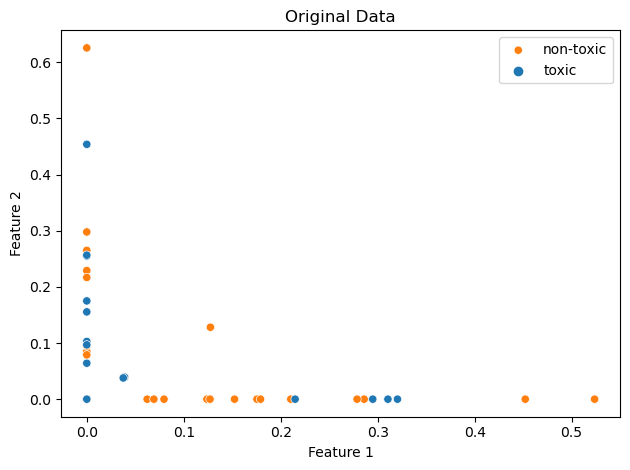

In [16]:
import seaborn as sns
label_dict = {1: "non-toxic", 0: "toxic"}

sns.scatterplot(x=X_tfidf.getcol(1).toarray().ravel(), y=X_tfidf.getcol(2).toarray().ravel(), hue=binary_Y.values)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")


plt.legend(labels=[label_dict[val] for val in binary_Y.unique()])

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
label_dict = {1: "non-toxic", 0: "toxic"}

sns.scatterplot(x=X_svd[:, 1], y=X_svd[:, 2], hue=binary_Y.values)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVD Reduced Dimensionality")

plt.legend(labels=[label_dict[val] for val in binary_Y.unique()])

plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=1234)

In [19]:
!pip install multilabel-knn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 MB 7.9 MB/s eta 0:00:00:00:0100:01


In [119]:
import multilabel_knn as mlk
model = mlk.multilabel_kNN(k=6, metric = "Jaccard")
import scipy.sparse as sp

model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
Y_prob = model.predict(X_test, return_prob = True)

Y_pred_dense = Y_pred.toarray()
f1 = f1_score(y_test, Y_pred_dense, average='micro')
print(f1)

0.6321816386969398


In [126]:
from sklearn.naive_bayes import BernoulliNB

model = MultiOutputClassifier(BernoulliNB(alpha=100))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='micro')
print("F1-Score:", f1)

F1-Score: 0.6601529955313186


In [133]:
from sklearn.ensemble import RandomForestClassifier
clf_br = BinaryRelevance(LogisticRegression(solver='liblinear',C=50,random_state=42,max_iter=100), require_dense=[False, True])

clf_br.fit(X_train, y_train)

y_pred_br = clf_br.predict(X_test)

precision_br = precision_score(y_test, y_pred_br, average='micro')
f1_score_br = f1_score(y_test, y_pred_br, average='micro')
print("Binary Relevance -  F1 Score: {:.2f}".format( f1_score_br))

Binary Relevance -  F1 Score: 0.75


In [137]:
from sklearn.ensemble import RandomForestClassifier

#mlb = MultiLabelBinarizer()
#Y_train = mlb.fit_transform(y_train)
#Y_test = mlb.transform(y_test)

base_clf = RandomForestClassifier(n_estimators=15)

chain = ClassifierChain(base_clf)

chain.fit(X_train, y_train)

y_pred = chain.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))

0.717844591956267
